In [1]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [2]:
!tesseract --help-oem

OCR Engine modes:
  0    Legacy engine only.
  1    Neural nets LSTM engine only.
  2    Legacy + LSTM engines.
  3    Default, based on what is available.


In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pytesseract
import download
from extract import unsharp_mask

In [2]:
def show(image):
    plt.figure(figsize = (20,10))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation='nearest')
    plt.show()

https://youtu.be/Oevq2aSOs0M?t=1635

[youtube] Oevq2aSOs0M: Downloading webpage
[youtube] Oevq2aSOs0M: Downloading android player API JSON
[info] Oevq2aSOs0M: Downloading 1 format(s): 18
[download] download\Oevq2aSOs0M.mp4 has already been downloaded
[download] 100% of 616.65MiB


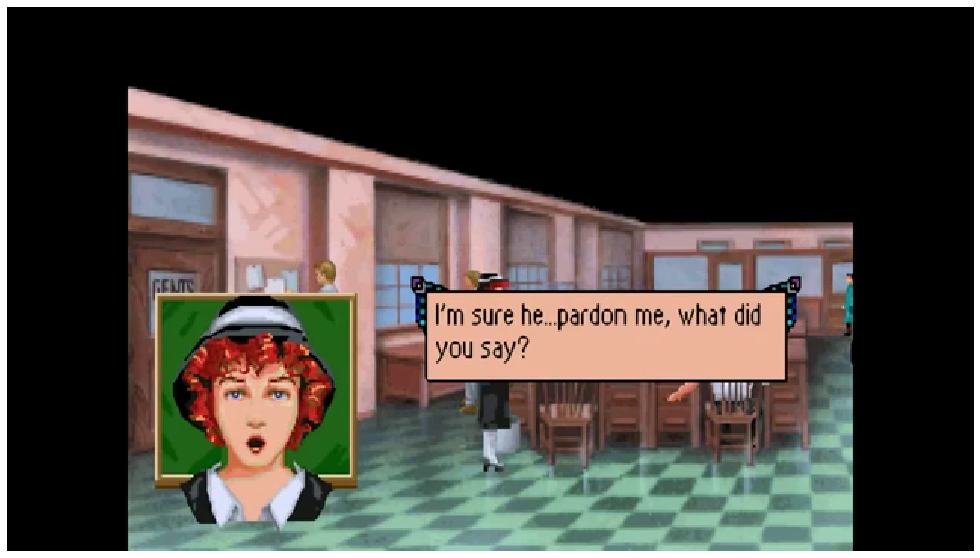

In [3]:
im = download.get_frame('Oevq2aSOs0M', 720)
show(im)

In [4]:
print(pytesseract.image_to_string(im))

@

i: Ym sure he..pardon me, what did a 5
you say’ |



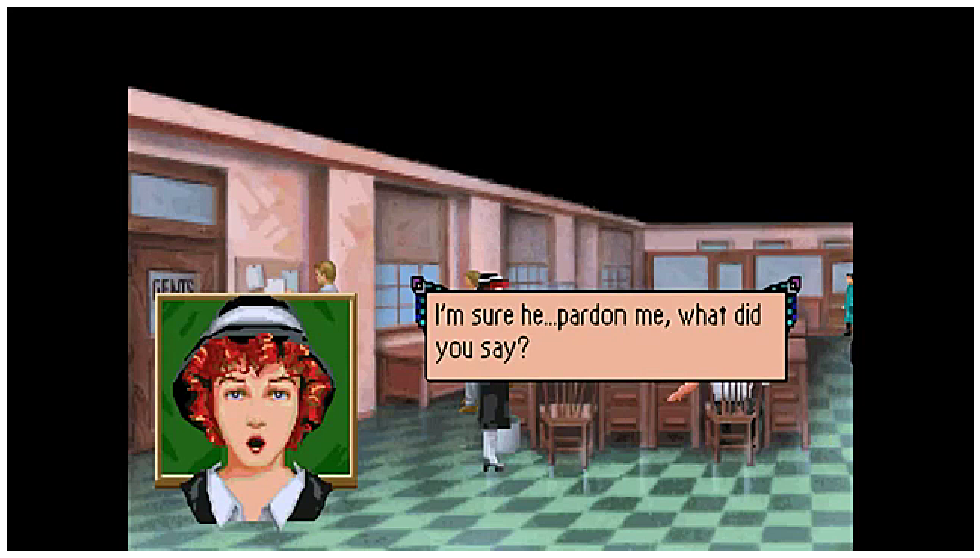

In [5]:
unsharp = unsharp_mask(im)
show(unsharp)

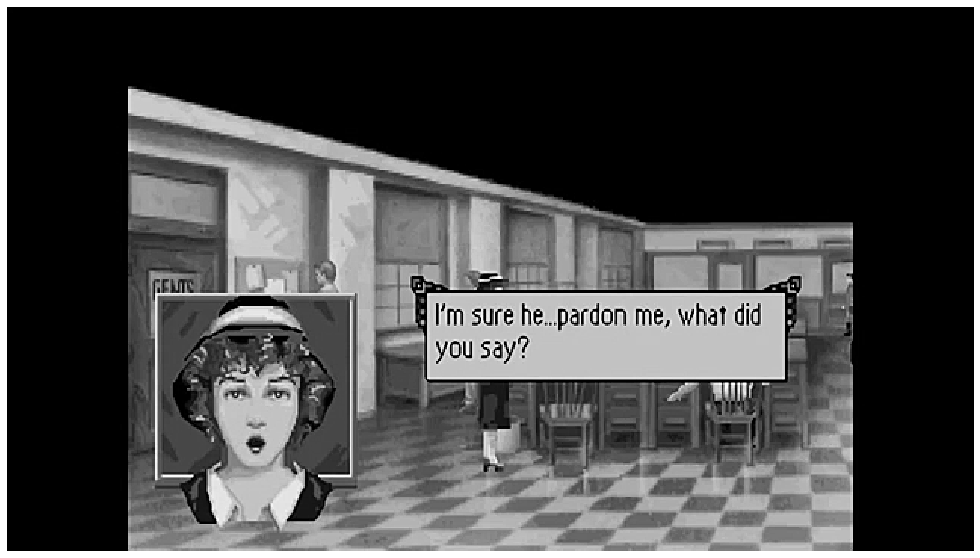

In [6]:
gray = cv2.cvtColor(unsharp, cv2.COLOR_BGR2GRAY)  # В оттенки серого
show(gray)

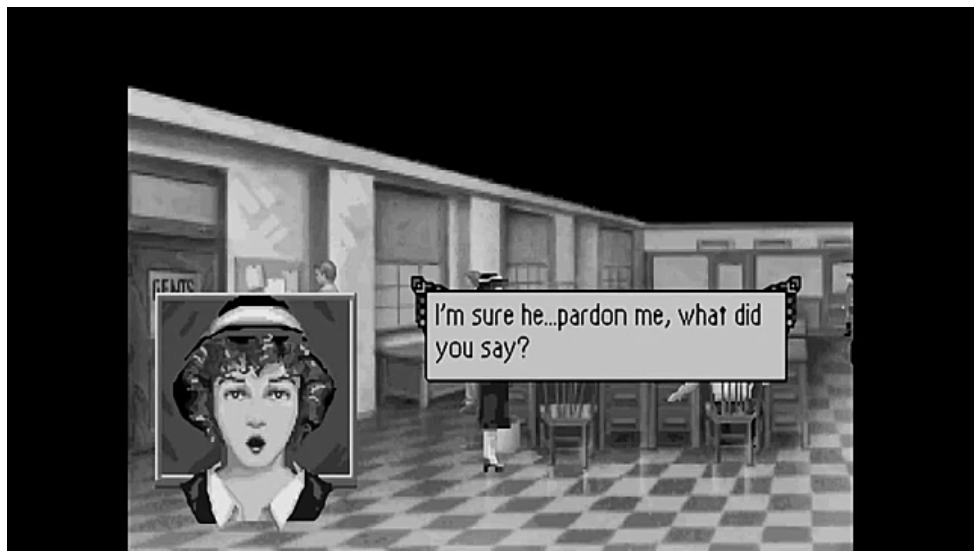

In [7]:
gray_x6 = cv2.resize(gray, None, fx=6, fy=6)
blur = cv2.medianBlur(gray_x6, 3)
show(blur)

In [8]:
print(pytesseract.image_to_string(blur, config='--psm 4'))

In [9]:
print(pytesseract.image_to_string(blur))

In [10]:
print(pytesseract.image_to_string(gray, config='--psm 4'))

|

I'm sure don me, what did
you say’




In [11]:
print(pytesseract.image_to_string(gray))

OL

don me, what did




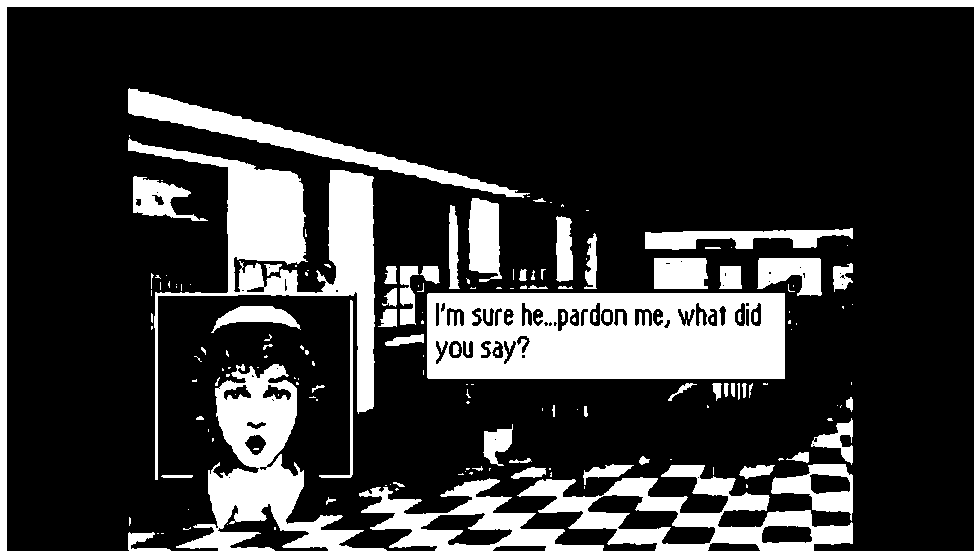

In [12]:
thresh = cv2.threshold(gray_x6, 150, 255, cv2.THRESH_BINARY)[1]
show(thresh)

In [13]:
print(pytesseract.image_to_string(thresh))

Finn sure re he. aE me, what did
| you say?

